In [6]:
import math
import pandas_datareader as web
import numpy as np
from pandas.util.testing import assert_frame_equal
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')

C:\Users\L-ven Lew\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [7]:
df = pd.read_csv('KLCI.csv', index_col =0)
df.rename(columns = {'close':'Closing_Index'}, inplace = True)
df['Trading_Date'] = pd.to_datetime(df['date'], format="%d/%m/%Y", errors='ignore')
df.sort_index(ascending=False, inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 1225 to 0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1226 non-null   object        
 1   Closing_Index  1226 non-null   float64       
 2   Trading_Date   1226 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 38.3+ KB


date             0
Closing_Index    0
Trading_Date     0
dtype: int64

In [8]:
df1 = df.drop(columns=['date'])
df2 = df1.set_index('Trading_Date')
df2

,Closing_Index
Trading_Date,
2015-03-10,1789.729980
2015-03-11,1778.160034
2015-03-12,1786.869995
2015-03-13,1781.750000
2015-03-16,1780.540039
...,...
2020-03-03,1478.640015
2020-03-04,1489.949951
2020-03-05,1491.030029


In [2]:
import matplotlib.pyplot as plt

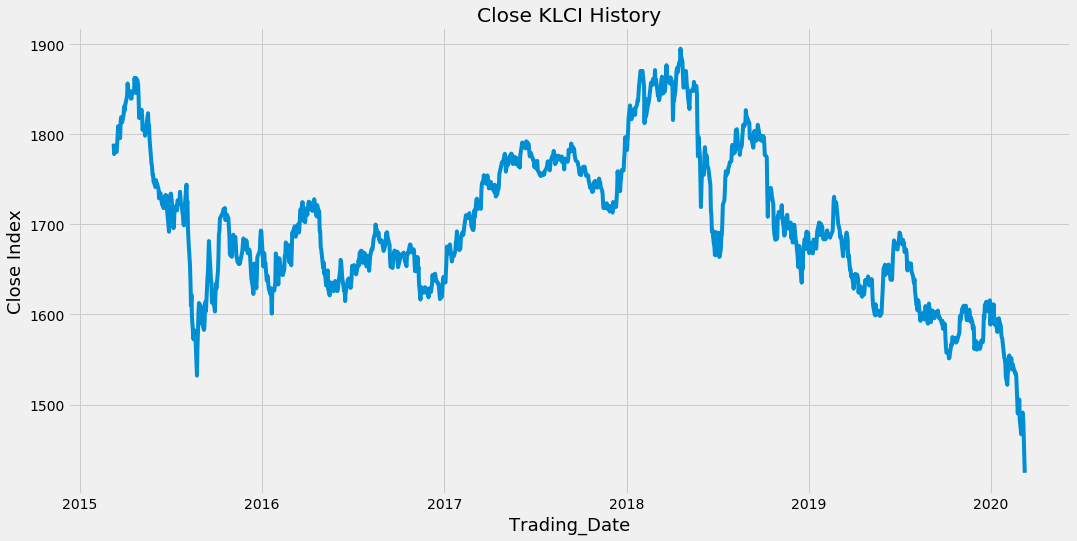

In [9]:
plt.figure(figsize =(16,8))
plt.title("Close KLCI History")
plt.plot(df2['Closing_Index'])
plt.xlabel('Trading_Date', fontsize =18)
plt.ylabel('Close Index', fontsize =18)
plt.show()

In [230]:
from fbprophet import Prophet
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

In [244]:
# Machine Learning 
## create Train and Valid Data
train = df2[:981]
valid = df2[981:]
print(train)
print(valid)
valid.shape

              Closing_Index
Trading_Date               
2015-03-10      1789.729980
2015-03-11      1778.160034
2015-03-12      1786.869995
2015-03-13      1781.750000
2015-03-16      1780.540039
...                     ...
2019-03-06      1686.819946
2019-03-07      1686.949951
2019-03-08      1679.900024
2019-03-11      1664.630005
2019-03-12      1671.280029

[981 rows x 1 columns]
              Closing_Index
Trading_Date               
2019-03-13      1678.239990
2019-03-14      1674.520020
2019-03-15      1680.540039
2019-03-18      1690.939941
2019-03-19      1687.680054
...                     ...
2020-03-03      1478.640015
2020-03-04      1489.949951
2020-03-05      1491.030029
2020-03-06      1483.099976
2020-03-09      1424.160034

[245 rows x 1 columns]


(245, 1)

In [290]:
# Making Prediction for the validation set and check the RMSE (Root-mean-square error (RMSE)) using the train Value.
preds = []
for i in range(0,valid.shape[0]):
    a = train['Closing_Index'][len(train)-245+i:].sum() + sum(preds)
    b = a/245
    preds.append(b)
    print(preds)
len(preds)

[1753.1492242448978]
[1753.1492242448978, 1752.7962823234484]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232, 1751.980284837431]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232, 1751.980284837431, 1751.52293894289]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232, 1751.980284837431, 1751.52293894289, 1751.092175187555]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232, 1751.980284837431, 1751.52293894289, 1751.092175187555, 1750.7077758209734]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232, 1751.980284837431, 1751.52293894289, 1751.092175187555, 1750.7077758209734, 1750.3172360692224]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232, 1751.980284837431, 1751.52293894289, 1751.092175187555, 1750.7077758209734, 1750.3172360692224, 1749.918776049097]
[1753.1492242448978, 1752.7962823234484, 1752.42434860232, 1751.980284837431, 1751.52293894289, 1751.092175187555, 1750.707775

245

In [292]:
import numpy as np
valid1 = valid
valid1['Prediction'] = np.array(preds)
valid1

C:\Users\L-ven Lew\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Closing_Index,Prediction
Trading_Date,,
2019-03-13,1678.239990,1753.149224
2019-03-14,1674.520020,1752.796282
2019-03-15,1680.540039,1752.424349
2019-03-18,1690.939941,1751.980285
2019-03-19,1687.680054,1751.522939
...,...,...
2020-03-03,1478.640015,1725.393636
2020-03-04,1489.949951,1725.551079
2020-03-05,1491.030029,1725.708635


In [298]:
# 100-day moving average
df['pandas_SMA_100'] = df.iloc[:,1].rolling(window=101).mean()

In [299]:
# 50-day moving average
df['pandas_SMA_50'] = df.iloc[:,1].rolling(window=51).mean()

In [301]:
df3 = df.set_index('Trading_Date')
df3

,date,Closing_Index,pandas_SMA_100,pandas_SMA_50
Trading_Date,,,,
2015-03-10,10/03/2015,1789.729980,NaN,NaN
2015-03-11,11/03/2015,1778.160034,NaN,NaN
2015-03-12,12/03/2015,1786.869995,NaN,NaN
2015-03-13,13/03/2015,1781.750000,NaN,NaN
2015-03-16,16/03/2015,1780.540039,NaN,NaN
...,...,...,...,...
2020-03-03,03/03/2020,1478.640015,1570.624058,1560.265884
2020-03-04,04/03/2020,1489.949951,1570.017326,1558.186275
2020-03-05,05/03/2020,1491.030029,1569.414950,1555.850000


In [ ]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-407+i:].sum() + sum(preds)
    b = a/407
    preds.append(b)
    print(preds)
len(preds)

In [235]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Closing_Index'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
130.10190497399174


In [237]:
valid['Prediction'] = preds
import math
import pandas_datareader as web
import numpy as np
from pandas.util.testing import assert_frame_equal
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')valid

C:\Users\L-ven Lew\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Closing_Index,Prediction
Trading_Date,,
2019-03-13,1678.239990,1753.149224
2019-03-14,1674.520020,1752.796282
2019-03-15,1680.540039,1752.424349
2019-03-18,1690.939941,1751.980285
2019-03-19,1687.680054,1751.522939
...,...,...
2020-03-03,1478.640015,1725.393636
2020-03-04,1489.949951,1725.551079
2020-03-05,1491.030029,1725.708635


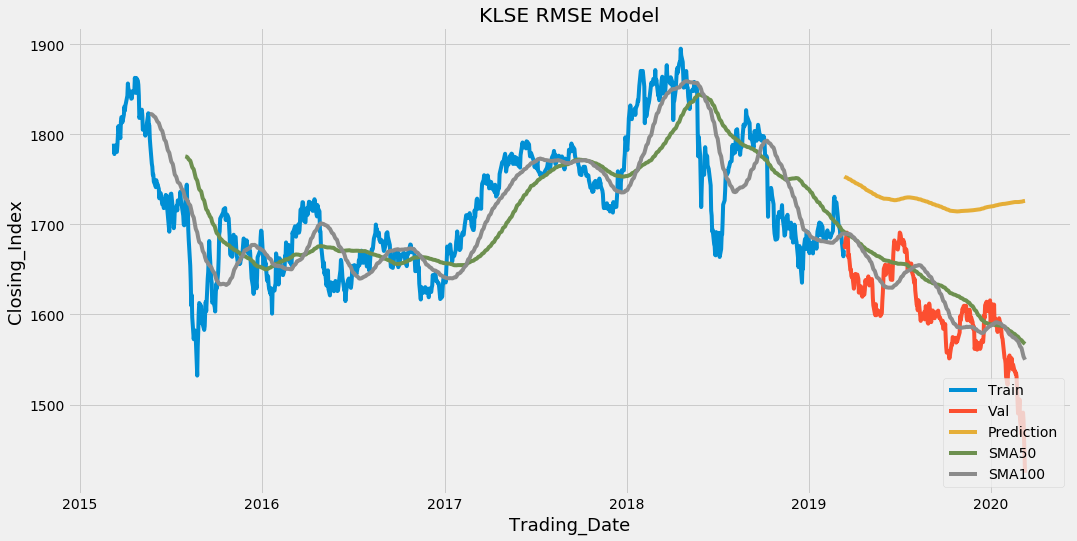

In [302]:
import math
import pandas_datareader as web
import numpy as np
from pandas.util.testing import assert_frame_equal
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')
plt.figure(figsize =(16,8))
plt.title('KLSE RMSE Model')
plt.xlabel('Trading_Date', fontsize =18)
plt.ylabel('Closing_Index', fontsize =18)
plt.plot(train['Closing_Index'])
plt.plot(valid[['Closing_Index','Prediction']])
plt.plot(df3[['pandas_SMA_100','pandas_SMA_50']])
plt.legend(['Train', 'Val','Prediction','SMA50','SMA100'], loc = 'lower right')
plt.show()

In [ ]:
df1 = df.sort_values(by=index,ascending=False)
df = df.sort_values(by="date")
df.to_csv('time.csv')
df.drop(columns=['date'])
df1 = df.set_index('Trading_Date')
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%d/%m/%Y')
df.sort_index(ascending=False, inplace=True)
df1['date'] =pd.to_datetime(df1.date)
df2 = df1.sort_values(by='date',ascending=False)
df1= df.sort_index(ascending=False)
df1= df.sort_index(ascending=False)
df2 = pd.to_datetime(df1.set_index('date')).dt.strftime('%d/%m/%Y')
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y%m%d')
df['date'] =  pd.to_datetime(df['date'], format='%d%b%y')
df['date'] = df['date'].str.replace(r'\D', '')

In [40]:
# Get the number if rows and column in the dataset
df.shape

(1226, 1)

In [ ]:
# visualize the closing price history 